In [61]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import rfftn, rfftfreq, fftfreq

In [58]:
#box size in Mpc/h
L = 1000
N = 100000

x, y, z = np.random.random((3, N)) * L

In [59]:
# create the grdid (3d histogram)
n=64 #celle per lato
grid, edges = np.histogramdd((x, y, z), bins=(n, n, n), range=((0, L), (0, L), (0, L)))
grid.shape

(64, 64, 64)

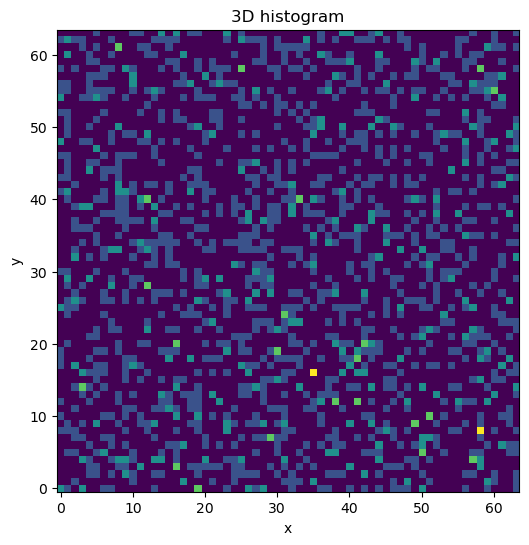

In [60]:
#plot grid fissando z=0
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(grid[:, :, 0], interpolation='nearest', origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('3D histogram')
plt.show()
#questa è la densità serva la delta

In [46]:
rho_mean = N / L**3

#compute density contrast delta
cell_volume = (L / n)**3
delta = (grid - rho_mean * cell_volume) / (rho_mean*cell_volume)

In [47]:
#compute the FFT of the contrast density field

delta_k = rfftn(delta)
delta_k.shape

(64, 64, 33)

In [ ]:
#valori k associati con fftfreq e rfftfreq
kF = 2 * np.pi / L
kx = fftfreq(n, d=1/n)*kF
ky = fftfreq(n, d=1/n)*kF
kz = fftfreq(n, d=1/n)*kF

KX, KY, KZ = np.meshgrid(kx, ky, kz)

KK = np.sqrt(KX**2 + KY**2 + KZ**2)

In [55]:
#correlazione dei due campi nello spazio di Fourier

pk_grid = delta_k * delta_k.conjugate()

print(pk_grid.shape)

(64, 64, 33)


In [56]:
#binning

n_bins_k = 20
kN = np.sqrt(2*np.pi) / L
n_bins = np.linspace(kF, kN, n_bins_k +1)

pk_array = np.zeros(n_bins_k)

for i in range(n_bins_k):
    k_min = n_bins[i]
    k_max = n_bins[i+1]
    
    mask = (KK.flatten() > k_min) & (KK.flatten() < k_max)
    pk = np.mean(pk_grid.flatten()[mask]).real 
    pk_array[i] = pk
    print(f'k_min: {k_min:.2f}, k_max: {k_max:.2f}, pk: {pk:.2f}')

IndexError: boolean index did not match indexed array along dimension 0; dimension is 135168 but corresponding boolean dimension is 262144

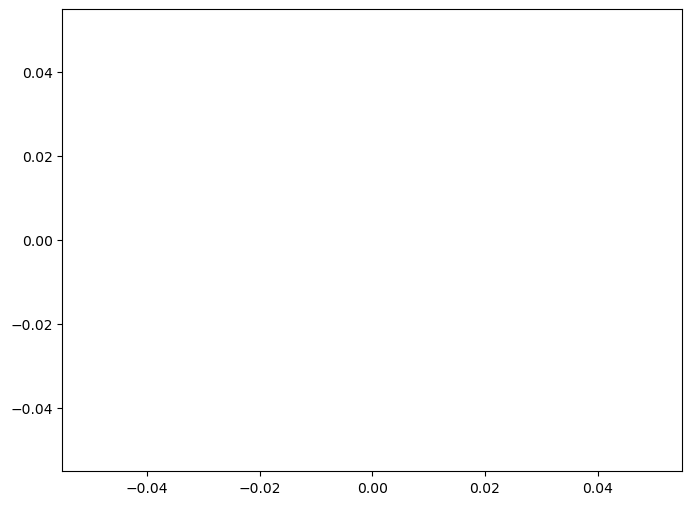

In [ ]:
k_center = 0.5 * (n_bins[:-1] + n_bins[1:])
plt.figure(figsize=(8, 6))
plt.plot(k_center, pk_array)
plt.show()